# Tutorial 8: Why is there a Jump (all possible combinations)??

---

### Introduction

Hello, in the last notebook we noticed that there is a jump with a certain feature, now we want to investigate why is that is the case. In the prevoius notebook, we noticed a jump by the 5th feature. 

first, let us call the data

In [17]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG

In [18]:
y_RG = y_RG.map({'S': 1, 'B': 0})

---

calling some packages

In [6]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets

In [8]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> get the best N features </i></b> 

In [9]:
%store -r featImp_RG

In [10]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


In [11]:
cols_ordered = df_input_RG.columns[sorted_idx][-400:]
cols_ordered

Index([1089.345, 1063.429,  962.734,  965.601,   914.19, 1076.231, 1250.068,
        960.238, 1267.175, 1047.108,
       ...
       1445.173, 1419.847, 1285.394, 1424.528,  850.046, 1248.864, 1269.657,
       1245.863, 1270.902, 1294.379],
      dtype='object', length=400)

---

In [12]:
Xtrain[cols_ordered]

,1089.345,1063.429,962.734,965.601,914.190,1076.231,1250.068,960.238,1267.175,1047.108,...,1445.173,1419.847,1285.394,1424.528,850.046,1248.864,1269.657,1245.863,1270.902,1294.379
379,1.028729,1.030634,1.004159,1.004502,1.044561,1.030239,0.965256,1.005951,0.966981,1.025428,...,0.796700,0.816613,0.965266,0.808167,1.052470,0.965650,0.966705,0.965603,0.966063,0.963941
206,-0.904164,-0.908347,-0.839096,-0.835209,-0.930014,-0.908296,-0.728967,-0.843634,-0.730239,-0.900330,...,-0.452495,-0.447041,-0.722030,-0.446465,-0.930544,-0.728422,-0.730134,-0.727560,-0.729684,-0.712608
432,1.122145,1.130994,1.050363,1.048614,1.148173,1.129931,0.994477,1.052448,0.996704,1.121994,...,0.855384,0.838502,0.989786,0.843569,1.155776,0.994813,0.996318,0.993234,0.996334,0.982111
272,1.280480,1.276190,1.288912,1.291579,1.260572,1.280038,1.325512,1.288275,1.326231,1.275333,...,1.492504,1.506321,1.333299,1.500297,1.245707,1.325703,1.327618,1.325240,1.327287,1.338556
321,1.060025,1.059908,1.056354,1.054482,1.072937,1.060009,1.027649,1.052442,1.026796,1.056701,...,0.808170,0.834994,1.028176,0.824187,1.085934,1.028247,1.027980,1.027653,1.028410,1.026382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,-0.878273,-0.876218,-0.884011,-0.882976,-0.881033,-0.876016,-0.877428,-0.883691,-0.876172,-0.877518,...,-0.636559,-0.647769,-0.874418,-0.641312,-0.892337,-0.877430,-0.875470,-0.877618,-0.875385,-0.872381
352,0.864009,0.870660,0.805071,0.800712,0.901922,0.870764,0.692594,0.808347,0.693379,0.863362,...,0.045670,0.052283,0.684628,0.046264,0.929434,0.692055,0.693880,0.691212,0.693527,0.671506
451,0.741530,0.757715,0.693019,0.690487,0.804252,0.753378,0.535054,0.697061,0.537864,0.755628,...,-0.668446,-0.633230,0.522034,-0.647791,0.844424,0.535109,0.536361,0.532918,0.535635,0.504907
416,1.049970,1.050386,1.017431,1.013633,1.065975,1.052346,0.962966,1.015219,0.965401,1.044772,...,0.672878,0.677292,0.960809,0.673813,1.069079,0.963161,0.964591,0.962735,0.964783,0.955840


### RFE

In [13]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [16]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
for i in range (1, 8):
    print(i)
    rfe = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i)
    # fit RFE
    rfe.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if rfe.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        
    print()
    selected.append(selected_feat)
    
    
    

1
Column: 260, Selected True, Rank: 1.000

2
Column: 38, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000

3
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000

4
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000
Column: 291, Selected True, Rank: 1.000

5
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000
Column: 291, Selected True, Rank: 1.000
Column: 373, Selected True, Rank: 1.000

6
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 198, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000
Column: 291, Selected True, Rank: 1.000
Column: 373, Selected True, Rank: 1.000

7
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 198, Selected True, Rank: 1.000
Column: 232, Selected True

---

In [19]:
selected

[[260],
 [38, 260],
 [38, 182, 260],
 [38, 182, 260, 291],
 [38, 182, 260, 291, 373],
 [38, 182, 198, 260, 291, 373],
 [38, 182, 198, 232, 260, 291, 373]]

In [20]:
from itertools import combinations

input = selected[-1]

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
selected2 = output[1:] 
selected2

[[38],
 [182],
 [198],
 [232],
 [260],
 [291],
 [373],
 [38, 182],
 [38, 198],
 [38, 232],
 [38, 260],
 [38, 291],
 [38, 373],
 [182, 198],
 [182, 232],
 [182, 260],
 [182, 291],
 [182, 373],
 [198, 232],
 [198, 260],
 [198, 291],
 [198, 373],
 [232, 260],
 [232, 291],
 [232, 373],
 [260, 291],
 [260, 373],
 [291, 373],
 [38, 182, 198],
 [38, 182, 232],
 [38, 182, 260],
 [38, 182, 291],
 [38, 182, 373],
 [38, 198, 232],
 [38, 198, 260],
 [38, 198, 291],
 [38, 198, 373],
 [38, 232, 260],
 [38, 232, 291],
 [38, 232, 373],
 [38, 260, 291],
 [38, 260, 373],
 [38, 291, 373],
 [182, 198, 232],
 [182, 198, 260],
 [182, 198, 291],
 [182, 198, 373],
 [182, 232, 260],
 [182, 232, 291],
 [182, 232, 373],
 [182, 260, 291],
 [182, 260, 373],
 [182, 291, 373],
 [198, 232, 260],
 [198, 232, 291],
 [198, 232, 373],
 [198, 260, 291],
 [198, 260, 373],
 [198, 291, 373],
 [232, 260, 291],
 [232, 260, 373],
 [232, 291, 373],
 [260, 291, 373],
 [38, 182, 198, 232],
 [38, 182, 198, 260],
 [38, 182, 198, 291

In [21]:
len(selected2)

127

### LR

In [22]:
lr = LogisticRegression()

In [23]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [24]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [25]:
from source.ml_acc import get_accuracy_ml

In [26]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected2:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        xte =  Xtest[cols_ordered].iloc[:, f]
        # print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str((f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([871.769], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([1302.834], dtype='object')
Index([865.079], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([1322.776], dtype='object')
Index([1302.18], dtype='object')
Index([870.89], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([1304.801], dtype='object')
Index([871.769, 1302.834], dtype='object')
Index([871.769, 865.079], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([871.769, 1322.776], dtype='object')
Index([871.769, 1302.18], dtype='object')
Index([871.769, 870.89], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([871.769, 1304.801], dtype='object')
Index([1302.834, 865.079], dtype='object')
Index([1302.834, 1322.776], dtype='object')
Index([1302.834, 1302.18], dtype='object')
Index([1302.834, 870.89], dtype='object')
Index([1302.834, 1304.801], dtype='object')
Index([865.079, 1322.776], dtype='object')
Index([865.079, 1302.18], dtype='object')
Index([865.079, 870.89], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([865.079, 1304.801], dtype='object')
Index([1322.776, 1302.18], dtype='object')
Index([1322.776, 870.89], dtype='object')
Index([1322.776, 1304.801], dtype='object')
Index([1302.18, 870.89], dtype='object')
Index([1302.18, 1304.801], dtype='object')
Index([870.89, 1304.801], dtype='object')
Index([871.769, 1302.834, 865.079], dtype='object')
Index([871.769, 1302.834, 1322.776], dtype='object')
Index([871.769, 1302.834, 1302.18], dtype='object')
Index([871.769, 1302.834, 870.89], dtype='object')
Index([871.769, 1302.834, 1304.801], dtype='object')
Index([871.769, 865.079, 1322.776], dtype='object')
Index([871.769, 865.079, 1302.18], dtype='object')
Index([871.769, 865.079, 870.89], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([871.769, 865.079, 1304.801], dtype='object')
Index([871.769, 1322.776, 1302.18], dtype='object')
Index([871.769, 1322.776, 870.89], dtype='object')
Index([871.769, 1322.776, 1304.801], dtype='object')
Index([871.769, 1302.18, 870.89], dtype='object')
Index([871.769, 1302.18, 1304.801], dtype='object')
Index([871.769, 870.89, 1304.801], dtype='object')
Index([1302.834, 865.079, 1322.776], dtype='object')
Index([1302.834, 865.079, 1302.18], dtype='object')
Index([1302.834, 865.079, 870.89], dtype='object')
Index([1302.834, 865.079, 1304.801], dtype='object')
Index([1302.834, 1322.776, 1302.18], dtype='object')
Index([1302.834, 1322.776, 870.89], dtype='object')
Index([1302.834, 1322.776, 1304.801], dtype='object')
Index([1302.834, 1302.18, 870.89], dtype='object')
Index([1302.834, 1302.18, 1304.801], dtype='object')
Index([1302.834, 870.89, 1304.801], dtype='object')
Index([865.079, 1322.776, 1302.18], dtype='object')
Index([865.079, 1322.776, 870.89], dtype='object')
Index([865.0

---

In [35]:
# ml_dicts

In [27]:
import json

In [28]:
with open('ml_rg_inv2.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [29]:
import json
with open('ml_rg_inv2.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_rg.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [30]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,[38]', 'lr,[182]', 'lr,[198]', 'lr,[232]', 'lr,[260]', 'lr,[291]', 'lr,[373]', 'lr,[38, 182]', 'lr,[38, 198]', 'lr,[38, 232]', 'lr,[38, 260]', 'lr,[38, 291]', 'lr,[38, 373]', 'lr,[182, 198]', 'lr,[182, 232]', 'lr,[182, 260]', 'lr,[182, 291]', 'lr,[182, 373]', 'lr,[198, 232]', 'lr,[198, 260]', 'lr,[198, 291]', 'lr,[198, 373]', 'lr,[232, 260]', 'lr,[232, 291]', 'lr,[232, 373]', 'lr,[260, 291]', 'lr,[260, 373]', 'lr,[291, 373]', 'lr,[38, 182, 198]', 'lr,[38, 182, 232]', 'lr,[38, 182, 260]', 'lr,[38, 182, 291]', 'lr,[38, 182, 373]', 'lr,[38, 198, 232]', 'lr,[38, 198, 260]', 'lr,[38, 198, 291]', 'lr,[38, 198, 373]', 'lr,[38, 232, 260]', 'lr,[38, 232, 291]', 'lr,[38, 232, 373]', 'lr,[38, 260, 291]', 'lr,[38, 260, 373]', 'lr,[38, 291, 373]', 'lr,[182, 198, 232]', 'lr,[182, 198, 260]', 'lr,[182, 198, 291]', 'lr,[182, 198, 373]', 'lr,[182, 232, 260]', 'lr,[182, 232, 291]', 'lr,[182, 232, 373]', 'lr,[182, 260, 291]', 'lr,[182, 260, 373]', 'lr,[182, 291, 373]

In [31]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [74]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 
    keys = []
    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        # print(ml_dicts[d][key][ 'tot_acc' ])
        if ml_dicts[d][key][ 'tot_acc' ] > .65:
            keys.append(key)
            print(ml_dicts[d][key][ 'tot_acc' ])

            acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
            sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
            sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
            sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
            sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([keys, acc_arr, sd_arr])    

0.9230769230769231
0.7524752475247525
0.7524752475247525
0.7450980392156863
0.6530612244897959
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.7549019607843137
0.6565656565656566
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.6530612244897959
0.7524752475247525
0.7549019607843137
0.6530612244897959
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.6530612244897959
0.7549019607843137
0.7524752475247525
0.7549019607843137
0.6565656565656566
0.6530612244897959
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.7549019607843137
0.7524752475247525
0.7524752475247525
0.7549019607843137
0.7524752475247525
0.7549019607843137
0.6530612244897959
0.7524752475247525
0.7524752475247525
0.7524752475247525
0.6530612244897959
0.7524752475247525
0.7549019607843137
0.7549019607843137
0.7524752475247525
0.7524752475247525
0.7549019607843137
0.7549019607843137
0.7524752475247525
0.7549019607843137
0.7524752475

In [75]:
len(arr_all[0][0])


60

[0.         0.05084746 0.10169492 0.15254237 0.20338983 0.25423729
 0.30508475 0.3559322  0.40677966 0.45762712 0.50847458 0.55932203
 0.61016949 0.66101695 0.71186441 0.76271186 0.81355932 0.86440678
 0.91525424 0.96610169 1.01694915 1.06779661 1.11864407 1.16949153
 1.22033898 1.27118644 1.3220339  1.37288136 1.42372881 1.47457627
 1.52542373 1.57627119 1.62711864 1.6779661  1.72881356 1.77966102
 1.83050847 1.88135593 1.93220339 1.98305085 2.03389831 2.08474576
 2.13559322 2.18644068 2.23728814 2.28813559 2.33898305 2.38983051
 2.44067797 2.49152542 2.54237288 2.59322034 2.6440678  2.69491525
 2.74576271 2.79661017 2.84745763 2.89830508 2.94915254 3.        ]


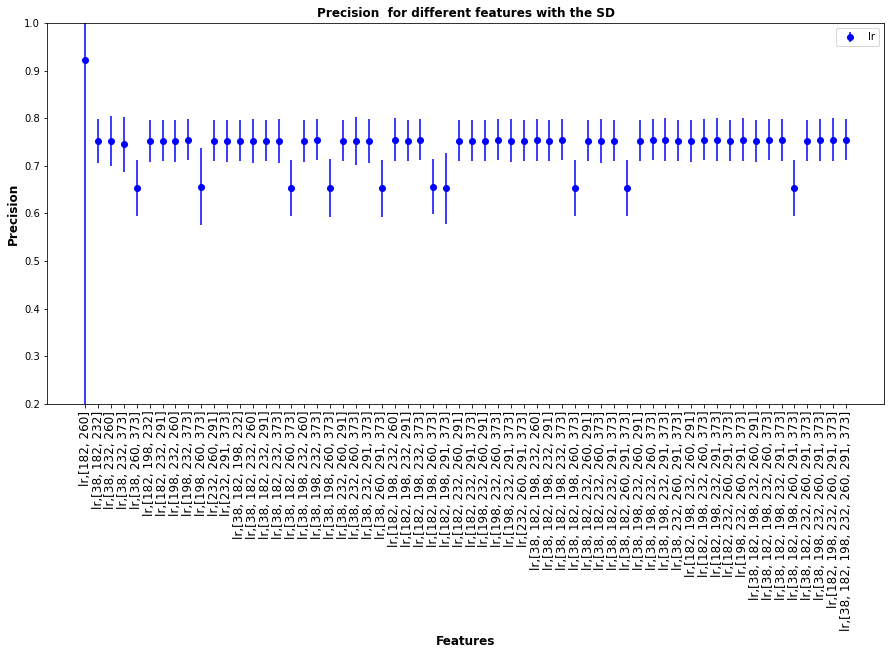

In [77]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,60)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = '90',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [95]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    keys = []
    for f_key in ml_dicts[m_key].keys():
        if ml_dicts[m_key][f_key][ 'tot_acc' ] > .65:
            keys.append(f_key)
            value = f_key.split(',')
            acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

            sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
            sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

            sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
            sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ keys, acc_diff_arr, sd_diff_arr]) 

In [96]:
len(arr_diff_all[0][2])

60

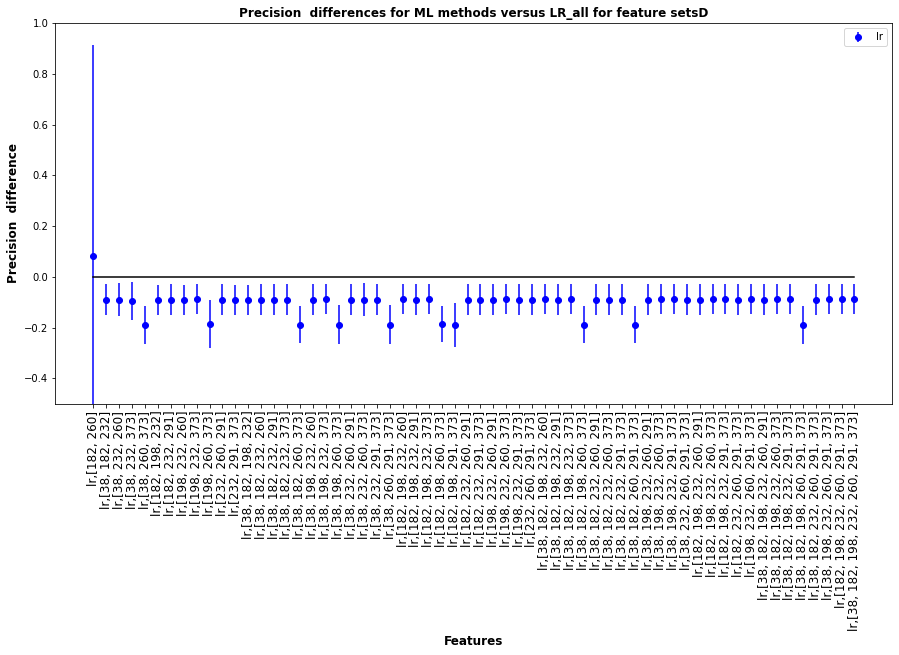

In [97]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,60)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(60*1), color = 'Black')        
plt.xticks(space, tickFeat, rotation = '90',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()

In [98]:
[[260],
 [38, 260],
 [38, 182, 260],
 [38, 182, 260, 291],
 [38, 182, 260, 291, 373],
 [38, 182, 198, 260, 291, 373],
 [38, 182, 198, 232, 260, 291, 373],
 [232, 198],
 [232, 198, 260],
 [232, 198, 260, 38],
 [232, 198, 260, 38, 182],
 [232, 198, 260, 38, 182, 291],
 [232, 198, 260, 38, 182, 291, 372]]

[[260],
 [38, 260],
 [38, 182, 260],
 [38, 182, 260, 291],
 [38, 182, 260, 291, 373],
 [38, 182, 198, 260, 291, 373],
 [38, 182, 198, 232, 260, 291, 373]]